In [1]:
import tensorflow as tf
import findspark

2022-08-21 10:22:16.633587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 10:22:16.633627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)

2.9.1


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Image Inventory')
print('----------')
print('Training: {}'.format(len(x_train)))
print('Testing:  {}'.format(len(x_test)))
print('----------')

Image Inventory
----------
Training: 60000
Testing:  10000
----------


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
5


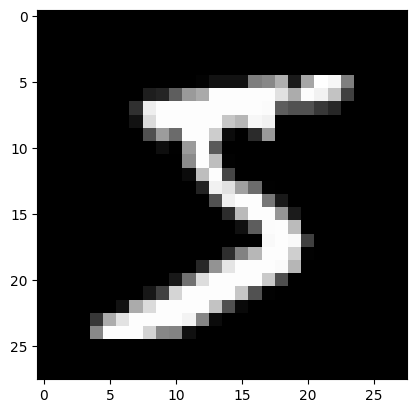

-----------------
0


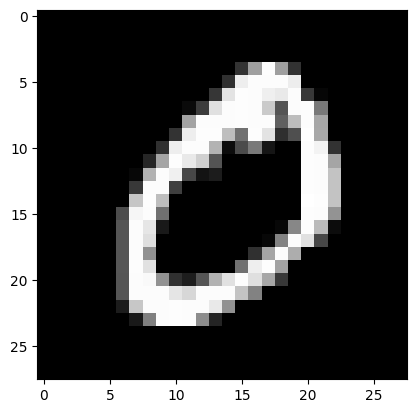

In [6]:
for i in range(2):
    image = x_train[i]
    image = np.array(image, dtype='float')
    label = y_train[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()
    

In [7]:
from matplotlib import image
for i in range(1,10):
    png = x_train[i]
    png = np.array(png, dtype='float')
    pixels = png.reshape((28, 28))
    image.imsave('image_no_{}.png'.format(i), pixels, cmap = 'gray')

In [8]:
import os
print(os.listdir())

['image_no_4.png', 'image_no_6.png', 'image_no_7.png', 'image_no_3.png', 'image_no_2.png', 'image_no_9.png', 'image_no_1.png', 'image_no_5.png', 'derby.log', 'image_no_8.png', 'MNIST with CNN.ipynb', 'pima-indians-diabetes.csv', '.ipynb_checkpoints']


In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [10]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

60000 train samples
10000 test samples


In [11]:
print(y_train[0].shape)

(10,)


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

2022-08-21 10:22:20.950437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-21 10:22:20.950475: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-21 10:22:20.950496: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-95-223): /proc/driver/nvidia/version does not exist
2022-08-21 10:22:20.950733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,batch_size=512,
          epochs=5,
          validation_data=(x_test, y_test))

2022-08-21 10:22:21.048965: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5


2022-08-21 10:22:21.675228: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.
2022-08-21 10:22:21.779052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.


  1/118 [..............................] - ETA: 1:24 - loss: 2.3175 - accuracy: 0.0996

2022-08-21 10:22:21.941697: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.
2022-08-21 10:22:22.012235: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.


118/118 [==============================] - 27s 227ms/step - loss: 0.2788 - accuracy: 0.9211 - val_loss: 0.0944 - val_accuracy: 0.9708
Epoch 2/5
118/118 [==============================] - 27s 225ms/step - loss: 0.0745 - accuracy: 0.9782 - val_loss: 0.0591 - val_accuracy: 0.9814
Epoch 3/5
118/118 [==============================] - 26s 221ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0495 - val_accuracy: 0.9847
Epoch 4/5
118/118 [==============================] - 26s 220ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0454 - val_accuracy: 0.9856
Epoch 5/5
118/118 [==============================] - 26s 219ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0438 - val_accuracy: 0.9855


In [15]:
stats = model.evaluate(x_test, y_test)
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.0438 - accuracy: 0.9855
The accuracy rate is 98.5%
The loss rate is 4.0%


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [17]:
filters, biases = model.layers[0].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

(5, 5, 1, 32)


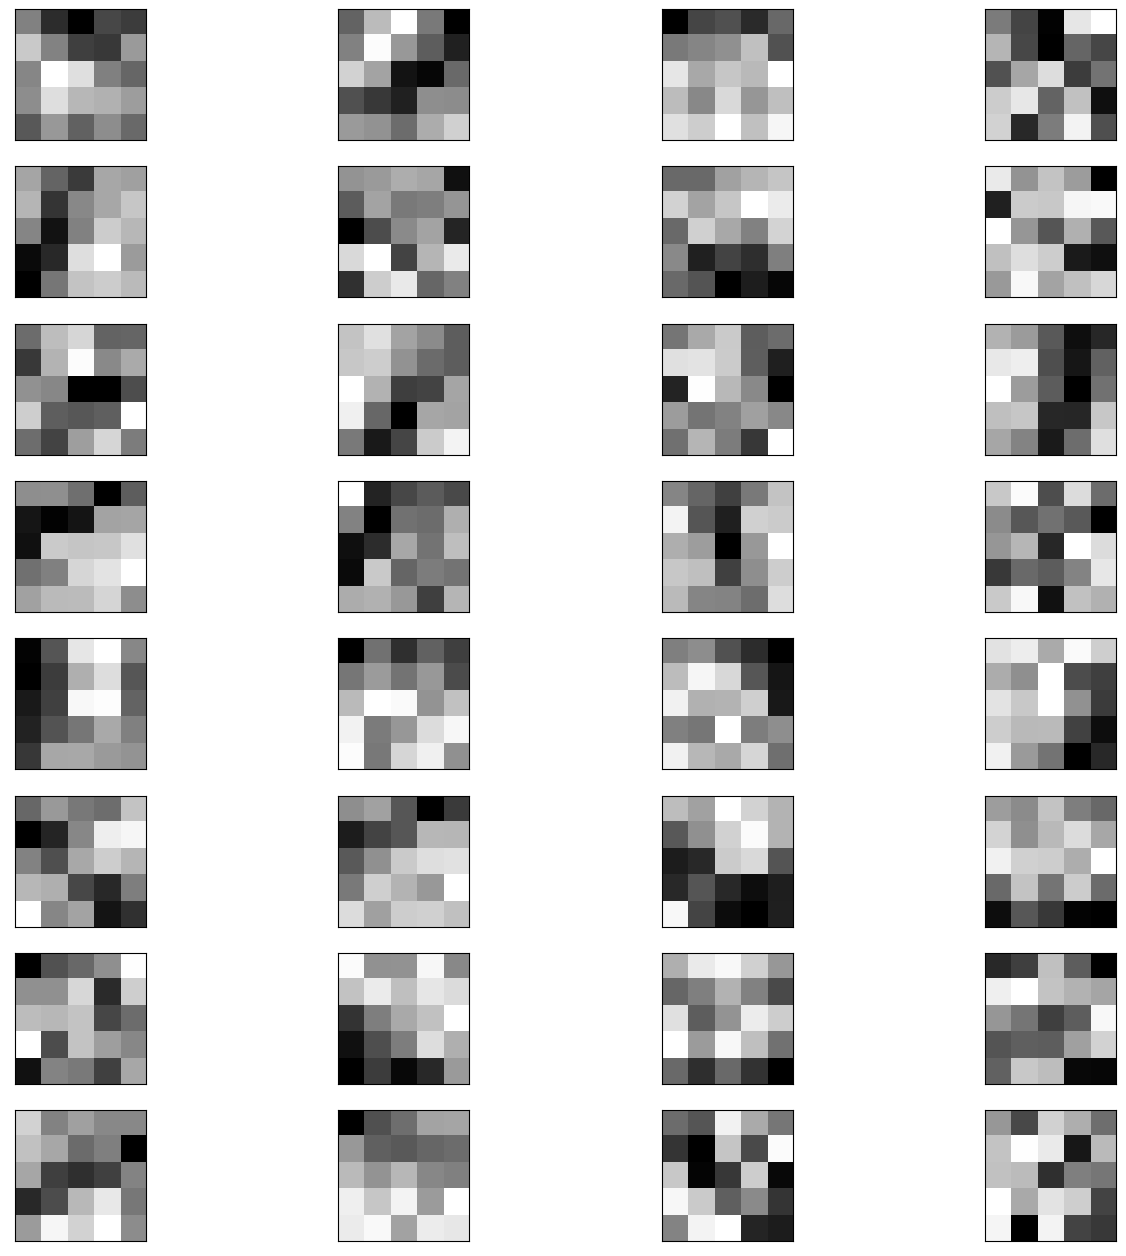

In [18]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    
    # specify subplot and turn of axis
    ax = plt.subplot(8, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :], cmap='gray')
    ix = ix + 1
# show the figure
plt.show()

In [19]:
feature_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [20]:
feature_maps = feature_model.predict(x_test[125:126])
print((feature_maps.shape))

1/1 [==============================] - 0s 106ms/step
(1, 24, 24, 32)


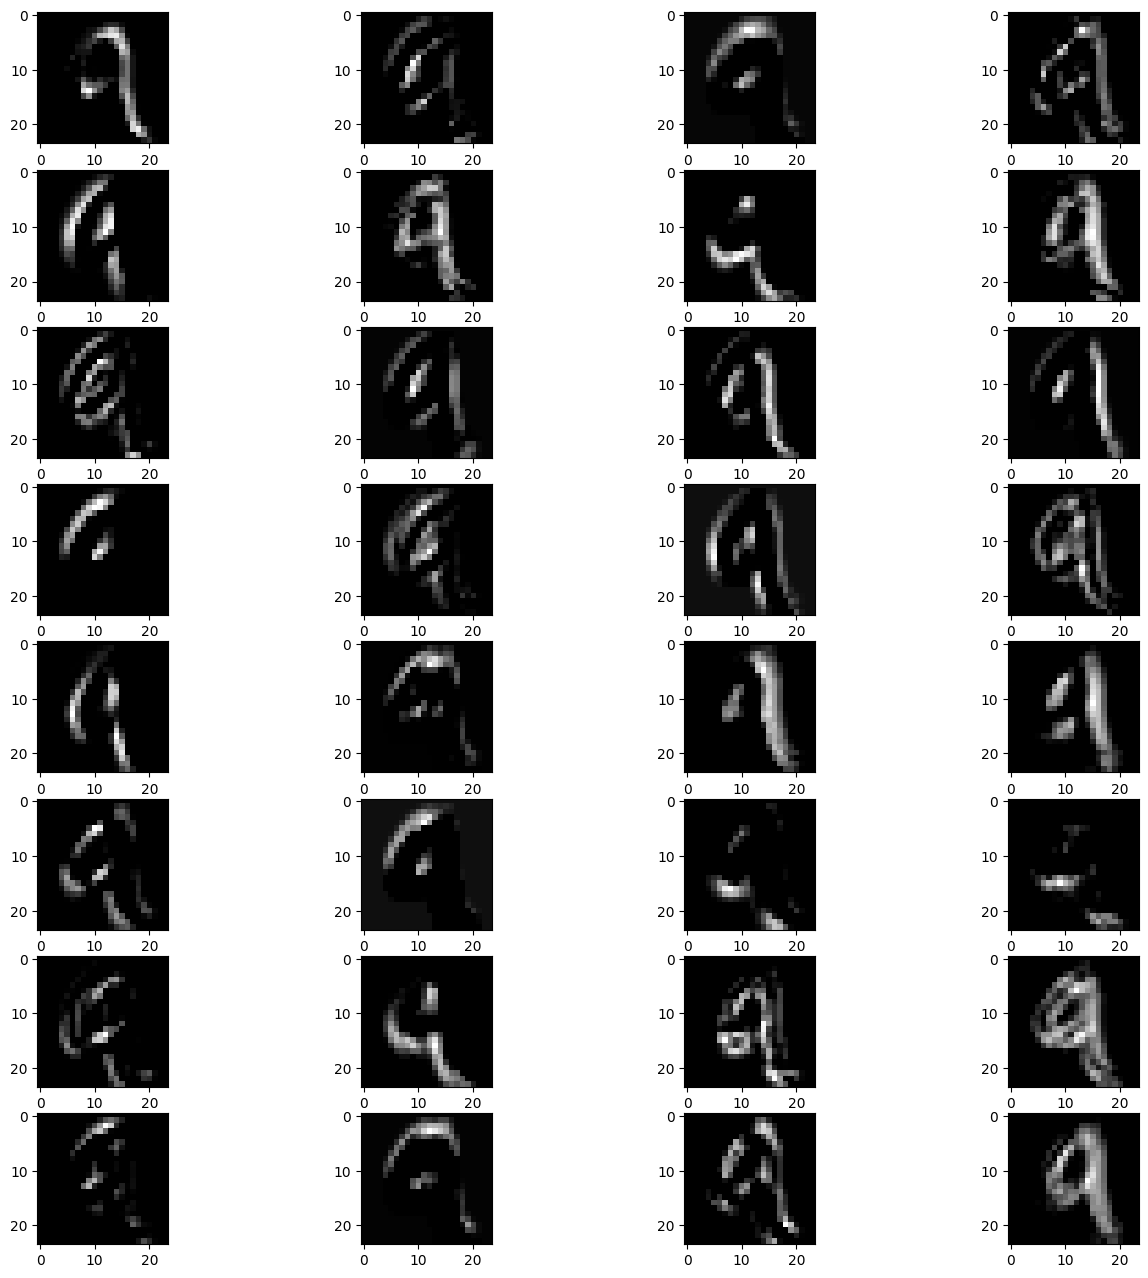

In [21]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
     ax = plt.subplot(8, 4, ix)
	#ax.set_xticks([])
	#ax.set_yticks([])
     plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
     ix += 1
plt.show()

In [22]:
y_test[125:126]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)